# METABRIC Subtype Histogram
This notebook can be used to make a histogram for any numerically-valued feature in the clinical dataset against patient subtypes. 

## Imports and Installations
Collection of any necessary imports/installations

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Clinical Data Knowledge Graphs
For this conference, we plan to use data from the patients' clinical data/

In [2]:
clinical_df = pd.read_csv('brca_metabric_clinical_data.tsv',sep='\t')
clinical_df.head()

,Study ID,Patient ID,Sample ID,Age at Diagnosis,Type of Breast Surgery,Cancer Type,Cancer Type Detailed,Cellularity,Chemotherapy,Pam50 + Claudin-low subtype,...,Relapse Free Status (Months),Relapse Free Status,Number of Samples Per Patient,Sample Type,Sex,3-Gene classifier subtype,TMB (nonsynonymous),Tumor Size,Tumor Stage,Patient's Vital Status
0,brca_metabric,MB-0000,MB-0000,75.65,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,NaN,NO,claudin-low,...,138.65,0:Not Recurred,1,Primary,Female,ER-/HER2-,0.000000,22.0,2.0,Living
1,brca_metabric,MB-0002,MB-0002,43.19,BREAST CONSERVING,Breast Cancer,Breast Invasive Ductal Carcinoma,High,NO,LumA,...,83.52,0:Not Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,10.0,1.0,Living
2,brca_metabric,MB-0005,MB-0005,48.87,MASTECTOMY,Breast Cancer,Breast Invasive Ductal Carcinoma,High,YES,LumB,...,151.28,1:Recurred,1,Primary,Female,NaN,2.615035,15.0,2.0,Died of Disease
3,brca_metabric,MB-0006,MB-0006,47.68,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,Moderate,YES,LumB,...,162.76,0:Not Recurred,1,Primary,Female,NaN,1.307518,25.0,2.0,Living
4,brca_metabric,MB-0008,MB-0008,76.97,MASTECTOMY,Breast Cancer,Breast Mixed Ductal and Lobular Carcinoma,High,YES,LumB,...,18.55,1:Recurred,1,Primary,Female,ER+/HER2- High Prolif,2.615035,40.0,2.0,Died of Disease


## Creating Histograms
The function call get_subtype_distribution() takes the clinical dataframe and also the feature of focus. For example, the call to make for finding distribution by age would be get_subtype_distribution(clinical_df, "Age at Diagnosis")

In [34]:
def get_subtype_distribution(df, feature, xlim=(0, 100), bins=10):
    df = df.dropna()
    x1 = df.loc[df["Pam50 + Claudin-low subtype"] =='claudin-low', feature]
    x2 = df.loc[df["Pam50 + Claudin-low subtype"] =='LumA', feature]
    x3 = df.loc[df["Pam50 + Claudin-low subtype"] =='LumB', feature]
    x4 = df.loc[df["Pam50 + Claudin-low subtype"] =='Normal', feature]
    x5 = df.loc[df["Pam50 + Claudin-low subtype"] =='Her2', feature]
    x6 = df.loc[df["Pam50 + Claudin-low subtype"] =='Basal', feature]
    plt.figure(figsize=(25,10)) 
    bins = np.linspace(xlim[0], xlim[1], bins)
    plt.hist([x1, x2, x3, x4, x5, x6], bins, label=['claudin-low', 'LumA', 'LumB', 'Normal', 'Her2', 'Basal'])
    plt.gca().set(title='Subtype Distribution per Feature', ylabel='Frequency')
    plt.xlim(xlim[0], xlim[1])
    plt.legend()

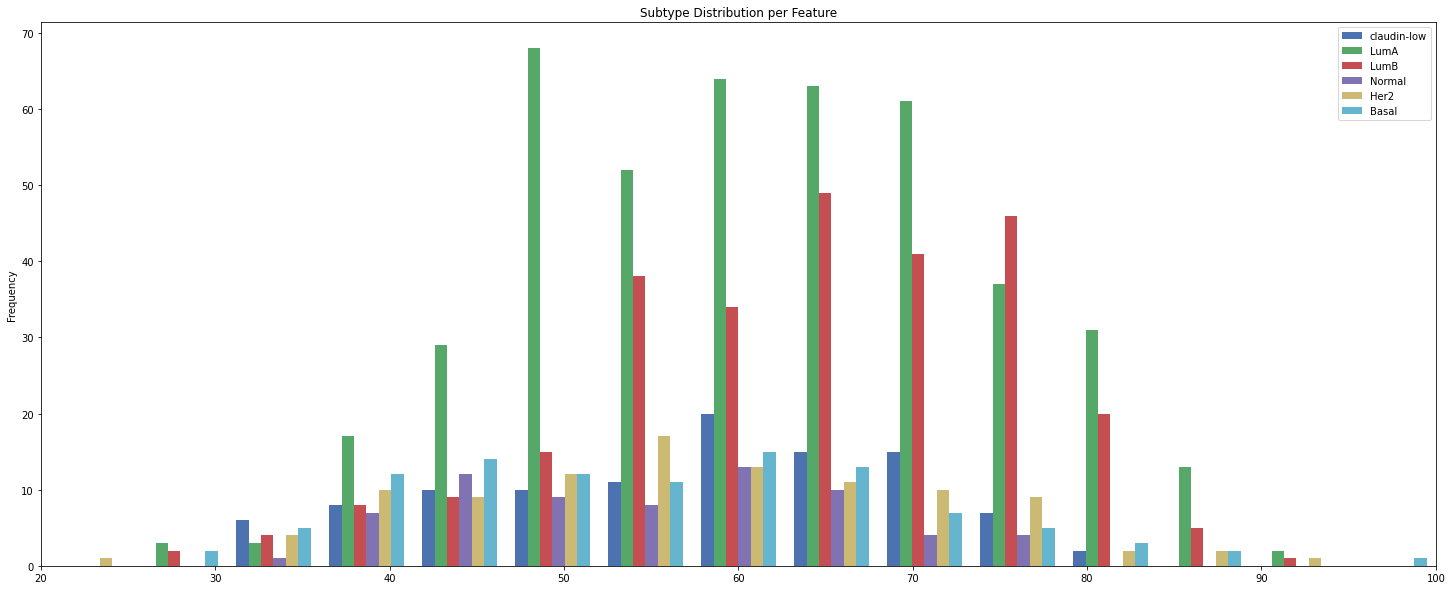

In [35]:
get_subtype_distribution(clinical_df, "Age at Diagnosis", xlim=(20,100), bins=16)